<img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Vertical-SinFondo.png"
     align="right"
     width="150"/>

# **Segundo Examen Parcial**

## **Modelo de predicción lineal**

- Esteban Gomez Valerio
---

In [1]:
# Importar las librerias
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
# Importar la base de datos
df = pd.read_csv('Datos/datos_gente.csv')
df.head()

,Altura,Ancho,Pie
0,185,55,28.0
1,173,44,26.5
2,163,44,24.0
3,162,44,24.5
4,172,46,27.0


In [3]:
fig1 = px.scatter(df, x="Altura", y="Ancho", 
                  title="Altura vs Ancho", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

# Scatter plot de Altura vs Pie
fig2 = px.scatter(df, x="Altura", y="Pie", 
                  title="Altura vs Pie", 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

# Mostrar ambas gráficas
fig1.show()
fig2.show()

In [4]:
# Crear figura 3D
fig = go.Figure(data=[go.Scatter3d(
    x=df['Ancho'], 
    y=df['Pie'], 
    z=df['Altura'],
    mode='markers',
    marker=dict(size=8, color=df['Altura'], colorscale='Viridis', opacity=0.8)
)])

# Configurar la visualización
fig.update_layout(
    title="Gráfica 3D: Altura vs Ancho vs Pie",
    scene=dict(
        xaxis_title="Ancho (cm)",
        yaxis_title="Pie (cm)",
        zaxis_title="Altura (cm)"
    )
)

# Mostrar la gráfica
fig.show()

## **Modelos Lineales**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
X = df[['Pie', 'Ancho']]
y = df['Altura']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f'Shape de X_train {X_train.shape}')
print(f'Shape de X_test {X_test.shape}')
print(f'Shape de y_train {y_train.shape}')
print(f'Shape de y_test {y_test.shape}')

Shape de X_train (14, 2)
Shape de X_test (4, 2)
Shape de y_train (14,)
Shape de y_test (4,)


### **Modelo 1: Linear Regression**

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
print(f'Shape de y_pred {y_pred.shape}')

Shape de y_pred (4,)


In [12]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'El r2: {r2:.3f}')
print(f'El rmse: {rmse:.3f}')

El r2: 0.846
El rmse: 3.641


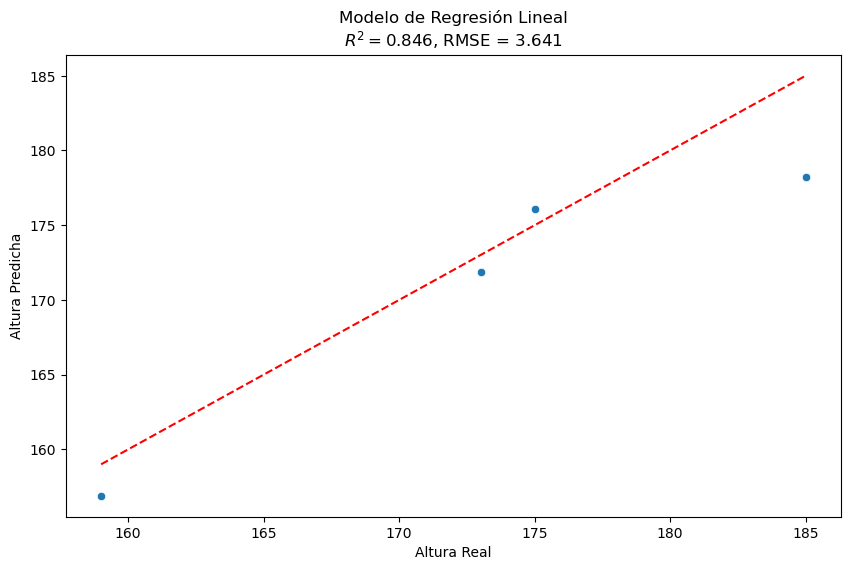

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de identidad
plt.title(f"Modelo de Regresión Lineal\n$R^2 = {r2:.3f}$, RMSE = {rmse:.3f}")
plt.xlabel("Altura Real")
plt.ylabel("Altura Predicha")
plt.show()